<a href="https://colab.research.google.com/github/R-8-12/Machine-Learning/blob/main/R_8_12_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

Dataset_train.iloc[:, 1:2] uses the .iloc[] indexer to select all rows (:) and columns from index 1 to 2 (exclusive of 2, hence only column 1 is selected). I

In [2]:
dataset_train = pd.read_csv('/content/sample_data/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

This line imports the MinMaxScaler class from the sklearn.preprocessing module. This class is a tool for scaling numerical features to a specific range.

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
# prompt: CODE FOR PRINT SHAPE OF DATASET
training_set.shape


(1258, 1)

This code snippet is responsible for creating the X_train and y_train datasets which will be used to train the Recurrent Neural Network (RNN). The goal is to predict the Google stock price at a specific time (t) based on the stock prices from the previous 60 days (t-60, t-59, ..., t-1).

In [5]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train


array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

### Reshaping

Reshaping X_train
This line of code is crucial for preparing the training data to be fed into the RNN. RNNs, especially LSTMs, expect input data to have a specific 3-dimensional structure:

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [8]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

units = 1: This argument specifies that the Dense layer will have one neuron. This is because you are trying to predict a single value - the Google stock price

units = 1: This argument specifies that the Dense layer will have one neuron. This is because you are trying to predict a single value - the Google stock price

In [13]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [15]:
regressor.fit(X_train, y_train, epochs = 75, batch_size = 32)

Epoch 1/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0814
Epoch 2/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0067
Epoch 3/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0061
Epoch 4/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048
Epoch 5/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0060
Epoch 6/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0052
Epoch 7/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0055
Epoch 8/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0050
Epoch 9/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0042
Epoch 10/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0054
Epoch 11/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0050
Epoch 12/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0037
Epoch 13/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0039
Epoch 14/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0037
Epoch 15/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0052
Epoc

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [21]:
dataset_test = pd.read_csv('/content/sample_data/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [22]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

print(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

[[0.9299055 ]
 [0.93113327]
 [0.92750577]
 [0.94415507]
 [0.93876032]
 [0.93403527]
 [0.93483518]
 [0.9313937 ]
 [0.94636878]
 [0.96569685]
 [0.97510976]
 [0.95966962]
 [0.97808617]
 [1.        ]
 [0.98076494]
 [0.97083116]
 [0.98450406]
 [0.96054394]
 [0.9371419 ]
 [0.92841729]
 [0.90804747]
 [0.8771858 ]
 [0.92153434]
 [0.93809063]
 [0.93165414]
 [0.95254483]
 [0.88812412]
 [0.88637547]
 [0.87032145]
 [0.88563137]
 [0.90743359]
 [0.91571173]
 [0.89941588]
 [0.91805566]
 [0.9089404 ]
 [0.9024853 ]
 [0.89456061]
 [0.91600938]
 [0.9132934 ]
 [0.88979835]
 [0.86589404]
 [0.89030062]
 [0.90335962]
 [0.89642086]
 [0.91777662]
 [0.93176576]
 [0.94114145]
 [0.95762334]
 [0.96413424]
 [0.96402262]
 [0.96971501]
 [0.95077759]
 [0.96294367]
 [0.96123223]
 [0.95475854]
 [0.95204256]
 [0.95163331]
 [0.95725128]
 [0.93796041]
 [0.93688146]
 [0.92955205]
 [0.94731751]
 [0.94307612]
 [0.96015329]
 [0.98087655]
 [0.98359253]
 [0.97827219]
 [0.98225314]
 [0.98288563]
 [0.98214153]
 [0.979779  ]
 [0.97

### Visualising the results

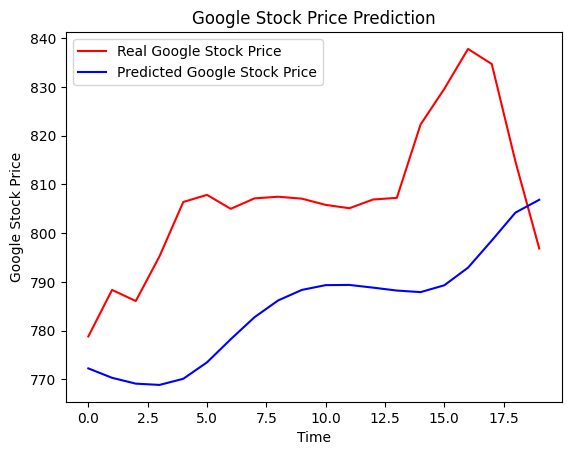

In [23]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()